In [1]:
# From https://mathoverflow.net/questions/19404/approximation-of-a-normal-distribution-function
# Last answer.
var('phix')

# This is a "bad" approximation - but it might be enough for us.
eq = phix == 1/(1+exp(x))
sol = solve(eq, x)
sol

[x == log(1/phix - 1)]

In [2]:
# We need the inverse of this to get the desired shape.
rhs = sol[0].rhs()
rhs # this is our approximator function

log(1/phix - 1)

(1.3374922084896001e-13)*(x - 0.5)^10 + 33.46405228758171*(x - 0.5)^9 + 10.756302521008406*(x - 0.5)^7 + 3.7647058823529416*(x - 0.5)^5 + 1.5686274509803924*(x - 0.5)^3 + 1.1764705882352942*x - 0.5882352941176471


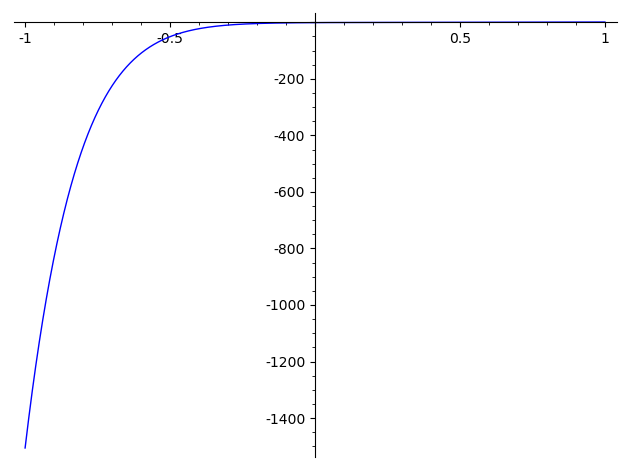

In [3]:
# Taylor expansion might be usefull for faster computation.

# NOTE: Only half of the Taylor series is nice -> we should probably mirror the nice half
deg = 10
cent = 0.5
fast_approx = -taylor(rhs.subs(phix==x), x, cent, deg)/3.4
print(fast_approx)
plot(fast_approx)

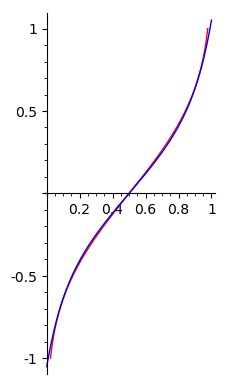

In [4]:
# Comparison with the "real" normal CDF.
T = RealDistribution('gaussian', 0.5)
p1 = parametric_plot((T.cum_distribution_function, x), (x, -1, 1), color="red")
# parametric_plot is used to plot the inverse.
p2 = plot(fast_approx, xmin=0)
p1 + p2

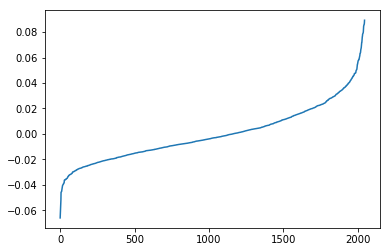

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
weights = np.load(os.path.expanduser('~/tmp/nnc_weights/inceptionv3_312_dense_2048x1000.npy')
a = np.argsort(weights, axis=0)
norms = np.linalg.norm(weights, axis=0)
sorted_weights = np.take_along_axis(weights, a, axis=0) / norms
y_target = sorted_weights[:, 0]
plt.plot(y_target)

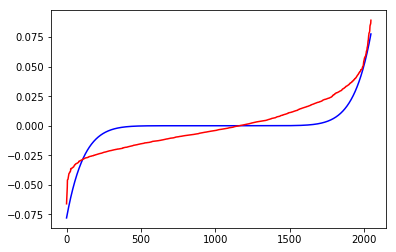

In [6]:
x_length, y_min, y_max = y_target.shape[0], y_target.min(), y_target.max()

span = 1
x_np = np.linspace(-span, span, x_length)
y = np.array(map(fast_approx, x_np*x_length))
y *= (y_max-y_min)/y.max()/2

plt.plot(y, color='b') + \
plt.plot(y_target, color='r')
plt.show()

/usr/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from sage.repl.ipython_kernel.kernel import SageKernel


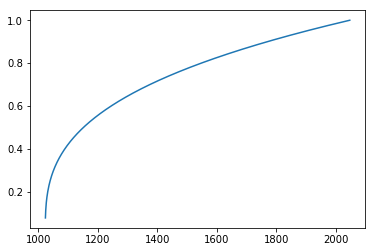

In [7]:
# TODO(vatai): Modifie the middle slaint of the curve.
plt.plot(np.power(x_np, 1/3))
plt.show()

/usr/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  IPKernelApp.launch_instance(kernel_class=SageKernel)


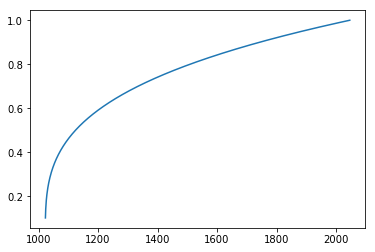

In [8]:
x_np = np.linspace(-span, span, x_length)
#print(x_np[1024])
x_np = np.power(x_np[1:], 0.3)
plt.plot(x_np)
plt.show()